In [5]:
from collections import defaultdict
import csv
import sys

import matplotlib.pyplot as plt
import cv2
from shapely.geometry import MultiPolygon, Polygon
import shapely.wkt
import shapely.affinity
import numpy as np
import tifffile as tiff

In [12]:
im_rgb = tiff.imread('C:/_Repositories/Satellite_Segmentation/data/6020_3_3.tif')
im_size = im_rgb.shape[:2]

In [7]:
def scale_percentile(matrix):
    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 1, axis=0)
    maxs = np.percentile(matrix, 99, axis=0) - mins
    matrix = (matrix - mins[None, :]) / maxs[None, :]
    matrix = np.reshape(matrix, [w, h, d])
    matrix = matrix.clip(0, 1)
    return matrix

(<Figure size 988.8x604.8 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x53ada90>)

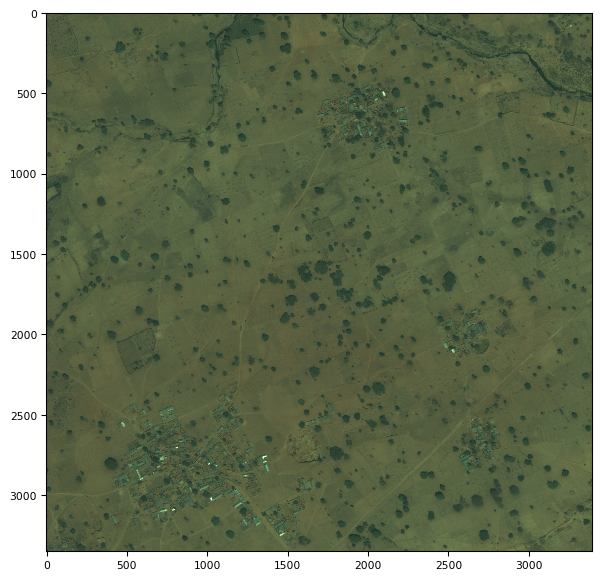

In [16]:
tiff.imshow(im_rgb)

In [19]:
im_rgb

array([[[515, 568, 596, ..., 714, 709, 709],
        [546, 551, 582, ..., 705, 698, 709],
        [565, 580, 618, ..., 718, 729, 717],
        ...,
        [421, 404, 361, ..., 713, 712, 707],
        [432, 362, 305, ..., 705, 698, 709],
        [469, 398, 320, ..., 698, 694, 711]],

       [[651, 699, 720, ..., 826, 822, 822],
        [676, 681, 707, ..., 814, 810, 820],
        [689, 706, 737, ..., 822, 833, 825],
        ...,
        [541, 531, 507, ..., 809, 806, 802],
        [553, 501, 467, ..., 804, 796, 803],
        [589, 536, 487, ..., 799, 793, 807]],

       [[470, 495, 507, ..., 557, 555, 555],
        [480, 484, 498, ..., 551, 548, 552],
        [486, 496, 511, ..., 554, 559, 555],
        ...,
        [420, 417, 408, ..., 541, 539, 536],
        [427, 403, 390, ..., 537, 533, 536],
        [448, 424, 403, ..., 533, 530, 536]]], dtype=uint16)

In [27]:
imag = cv2.cvtColor(im_rgb, cv2.COLOR_GRAY2BGR)
cvuint8 = cv2.convertScaleAbs(im_rgb, alpha=(255.0/65535.0))
cvuint8.shape

(3, 3348, 3396)

In [28]:
cvuint8

array([[[2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        ...,
        [2, 2, 1, ..., 3, 3, 3],
        [2, 1, 1, ..., 3, 3, 3],
        [2, 2, 1, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]]], dtype=uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


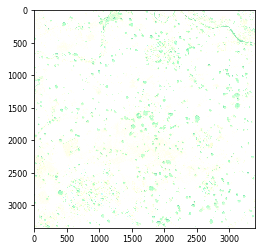

In [38]:
plt.imshow((im_rgb.transpose([1, 2, 0])/2).astype('int'))

In [36]:
im_rgb.transpose([1, 2, 0])/2

array([[[257.5, 325.5, 235. ],
        [284. , 349.5, 247.5],
        [298. , 360. , 253.5],
        ...,
        [357. , 413. , 278.5],
        [354.5, 411. , 277.5],
        [354.5, 411. , 277.5]],

       [[273. , 338. , 240. ],
        [275.5, 340.5, 242. ],
        [291. , 353.5, 249. ],
        ...,
        [352.5, 407. , 275.5],
        [349. , 405. , 274. ],
        [354.5, 410. , 276. ]],

       [[282.5, 344.5, 243. ],
        [290. , 353. , 248. ],
        [309. , 368.5, 255.5],
        ...,
        [359. , 411. , 277. ],
        [364.5, 416.5, 279.5],
        [358.5, 412.5, 277.5]],

       ...,

       [[210.5, 270.5, 210. ],
        [202. , 265.5, 208.5],
        [180.5, 253.5, 204. ],
        ...,
        [356.5, 404.5, 270.5],
        [356. , 403. , 269.5],
        [353.5, 401. , 268. ]],

       [[216. , 276.5, 213.5],
        [181. , 250.5, 201.5],
        [152.5, 233.5, 195. ],
        ...,
        [352.5, 402. , 268.5],
        [349. , 398. , 266.5],
        [354.5,